## Heart disease Identification using ensemble learning and deep learing

### Importing the required packages

In [82]:
import numpy as np ## For mathematical operations
import pandas as pd ## To perform operations using dataframe
import matplotlib.pyplot as plt ## Visualization
import seaborn as sns
%matplotlib inline

In [83]:
# Loading Dataset
dataset=pd.read_csv("C:\\Users\\kvira\\Music\\MajorBasePaper\\dataset.csv")
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [84]:
# Dataset Info
print(dataset.shape)
print(dataset.describe())
dataset.info()

(303, 14)
              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860

## Data preprocessing

In [85]:
# Checking for null values
dataset.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [86]:
# Numerical form of columns
info = ["age", "1: male, 0: female",
            "chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic",
            "resting blood pressure", " serum cholestoral in mg/dl", "fasting blood sugar > 120 mg/dl",
            "resting electrocardiographic results (values 0,1,2)", " maximum heart rate achieved",
            "exercise induced angina", "oldpeak = ST depression induced by exercise relative to rest",
            "the slope of the peak exercise ST segment", "number of major vessels (0-3) colored by flourosopy",
            "thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]

age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
[1 0]
target      1.000000
exang       0.436757
cp          0.433798
oldpeak     0.430696
thalach     0.421741
ca          0.391724
slope       0.345877
thal        0.344029
sex         0.280937
age         0.225439
trestbps    0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: target, dtype: float64


D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='target', ylabel='count'>

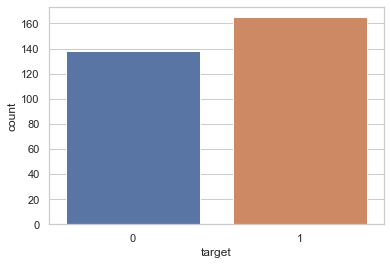

In [87]:
# Loading Features into target variable by taking only unique values of features
for i in range(len(info)):
        print(dataset.columns[i] + ":\t\t\t" + info[i])
#X = dataset.drop(['target'], axis=1).values
dataset["target"].describe()
print(dataset["target"].unique()) 
print(dataset.corr()["target"].abs().sort_values(ascending=False))
y = dataset["target"]
sns.countplot(y)

In [88]:
# Based on the target Label Count we show how many percentage of patients can be with heart disease and without heart disease
target_temp = dataset.target.value_counts()
print("target Label Count=",target_temp)
print("Percentage of patients without heart problems: " + str(round(target_temp[0] * 100 / 303, 2)))
print("Percentage of patients with heart problems: " + str(round(target_temp[1] * 100 / 303, 2)))

target Label Count= 1    165
0    138
Name: target, dtype: int64
Percentage of patients without heart problems: 45.54
Percentage of patients with heart problems: 54.46


## Data Visualization

- Using barplot we are comparing the features with the target feature

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sex', ylabel='target'>

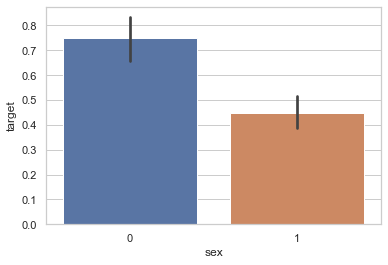

In [89]:
sns.barplot(dataset["sex"], y)

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cp', ylabel='target'>

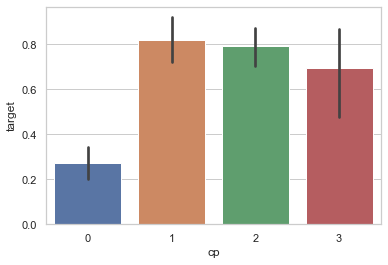

In [90]:
dataset["cp"].unique()
sns.barplot(dataset["cp"], y)

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fbs', ylabel='target'>

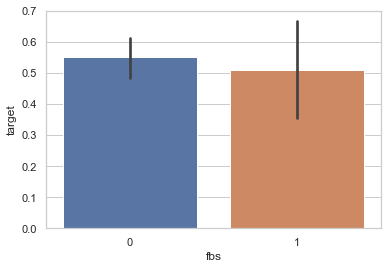

In [91]:
dataset["fbs"].describe()
dataset["fbs"].unique()
sns.barplot(dataset["fbs"], y)

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='restecg', ylabel='target'>

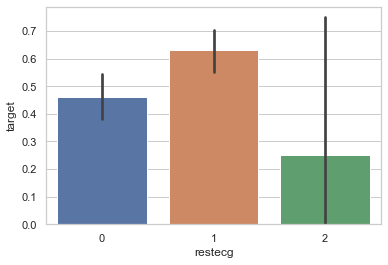

In [92]:
dataset["restecg"].unique()
sns.barplot(dataset["restecg"], y)

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='exang', ylabel='target'>

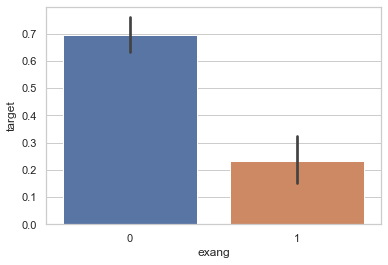

In [93]:
dataset["exang"].unique()
sns.barplot(dataset["exang"], y)

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='slope', ylabel='target'>

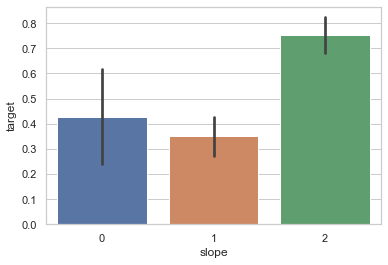

In [94]:
dataset["slope"].unique()
sns.barplot(dataset["slope"], y)

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ca', ylabel='target'>

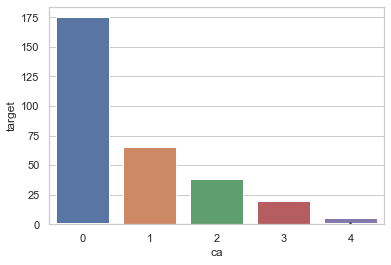

In [95]:
dataset["ca"].unique()
sns.countplot(dataset["ca"])
sns.barplot(dataset["ca"], y)

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='thal', ylabel='target'>

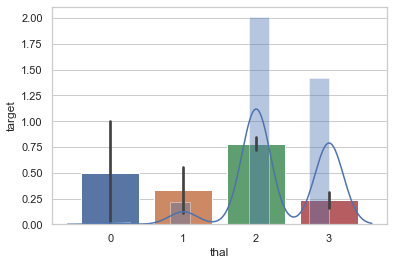

In [96]:
dataset["thal"].unique()
sns.barplot(dataset["thal"], y)
sns.distplot(dataset["thal"])

<AxesSubplot:title={'center':'Correlation with target'}>

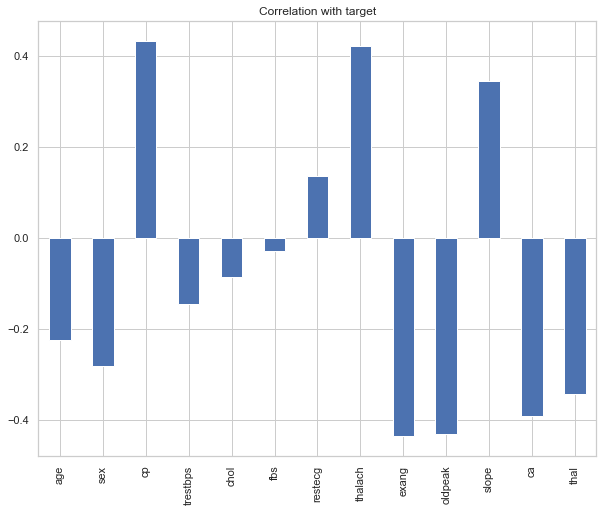

In [97]:
dataset.drop('target', axis=1).corrwith(dataset.target).plot(kind='bar', grid=True, figsize=(10, 8), 
                                                   title="Correlation with target")

In [98]:
X= dataset.iloc[:,0:13].values
y = dataset.iloc[:,-1].values

## Splitting to train and test Data

In [99]:
## The Train and Test data are split in ratio 60:40 ratio

In [100]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.37, random_state=0)
X_train.shape
print(X_train.shape)
X_test.shape
print(X_test.shape)
Y_train.shape
print(Y_train.shape)
Y_test.shape
print(Y_test.shape)

(190, 13)
(113, 13)
(190,)
(113,)


In [101]:
## Normalizing the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Building the models

In [102]:
## Linear regression model
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,Y_train)
Y_pred=lr.predict(X_test)
cm=confusion_matrix(Y_test.round(),Y_pred.round())
lr_acc=round((accuracy_score(Y_test.round(),Y_pred.round()))*100,2)
print("The accuracy score achieved using Linear Regression model is: {0:0.2f}" .format(lr_acc) + " %")

The accuracy score achieved using Linear Regression model is: 81.42 %


In [103]:
## SUPPORT VECTOR MACHINES
from sklearn import svm
sv = svm.SVC(kernel='sigmoid')
sv.fit(X_train, Y_train)
Y_pred_svm = sv.predict(X_test)
svm_acc = round(accuracy_score(Y_pred_svm, Y_test)*100, 2)
print("The accuracy score achieved using SVM is: {0:0.2f}" .format(svm_acc) + " %")

The accuracy score achieved using SVM is: 79.65 %


In [104]:
## K Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, Y_train)
Y_pred_knn = knn.predict(X_test)
knn_acc = round(accuracy_score(Y_pred_knn, Y_test)*100,2)
print("The accuracy score achieved using KNN model is: {0:0.2f}" .format(knn_acc) + " %")

The accuracy score achieved using KNN model is: 82.30 %


In [105]:
## Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 6)
dt.fit(X_train, Y_train)
dt_predicted = dt.predict(X_test)
dt_acc = round((accuracy_score(Y_test, dt_predicted))*100,2)
print("The accuracy score achieved using DecisionTree model is: {0:0.2f}" .format(dt_acc) + " %")

The accuracy score achieved using DecisionTree model is: 76.99 %



## Proposed Models

- In the proposed model we have used Ensemble learning and a deep learning model for better and precise accuracy.
- Ensemble learning is the process by which multiple models, such as classifiers , are generated and combined to solve a   particular computational intelligence problem.
- Ensemble learning is often used for better accuracy prediction.
- **In this project we have used ensemble of random forest classifier and decision tree and artificial neural network a deep learning model**


## Random Forest Classifier

In [107]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()

#GridSearchCV to find the optimal values of hyperparameters
parameters=[{'n_estimators':[100,150,200]}]
grid_search=GridSearchCV(rfc,parameters,scoring='accuracy',cv=5)
grid_search.fit(X_train,Y_train)
print(grid_search.best_params_)
best_rfc=grid_search.best_estimator_

rn_acc=round(best_rfc.score(X_test,Y_test)*100,2)
print("The accuracy score achieved using random forest classifier is: {0:0.2f}" .format(rn_acc) + " %")

{'n_estimators': 200}
The accuracy score achieved using random forest classifier is: 84.07 %


## Principle component analysis for feature selection with random forest classifier 

In [108]:
## Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
y_train = np.array(Y_train)
y_test = np.array(Y_test)

In [109]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
display(rfc.score(X_train, y_train))

1.0

### Features important to random forest for predicting heart disease

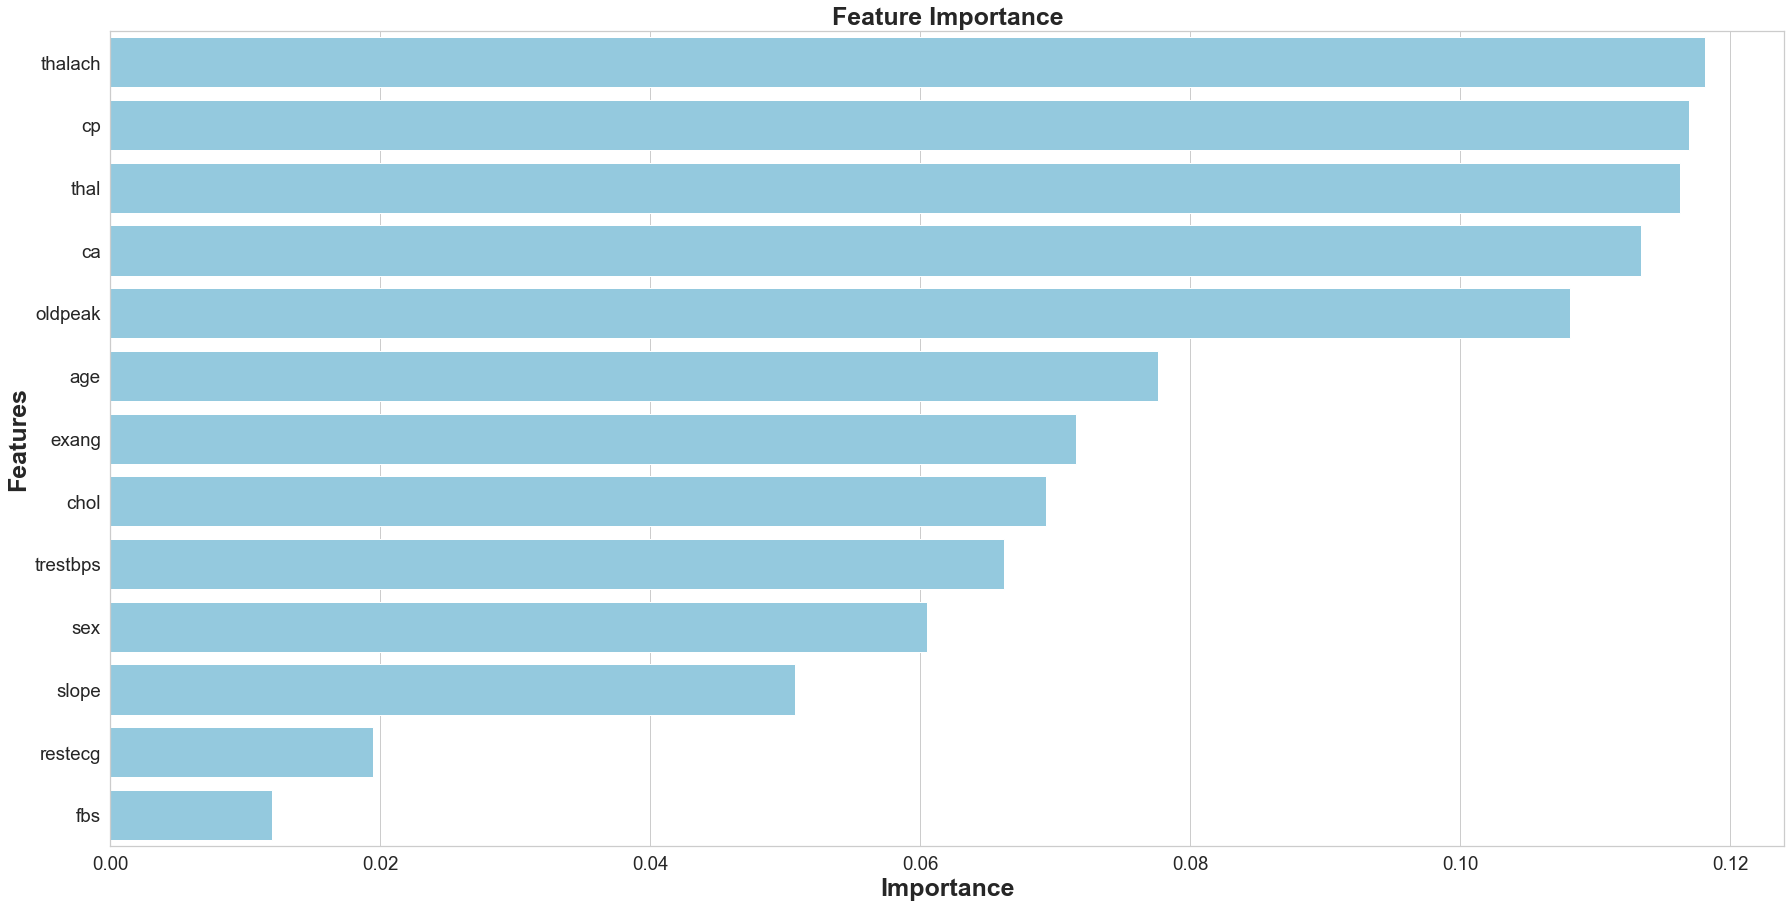

None

,Features,Gini-Importance
0,thalach,0.118093
1,cp,0.116944
2,thal,0.116294
3,ca,0.113340
4,oldpeak,0.108119
5,age,0.077612
6,exang,0.071515
7,chol,0.069324
8,trestbps,0.066157
9,sex,0.060482


In [110]:
feats = {}
for feature, importance in zip(dataset.columns, rfc.feature_importances_):
    feats[feature] = importance
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-Importance'})
importances = importances.sort_values(by='Gini-Importance', ascending=False)
importances = importances.reset_index()
importances = importances.rename(columns={'index': 'Features'})
sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True, font_scale = 1.7)
fig, ax = plt.subplots()
fig.set_size_inches(30,15)
sns.barplot(x=importances['Gini-Importance'], y=importances['Features'], data=importances, color='skyblue')
plt.xlabel('Importance', fontsize=25, weight = 'bold')
plt.ylabel('Features', fontsize=25, weight = 'bold')
plt.title('Feature Importance', fontsize=25, weight = 'bold')
display(plt.show())
display(importances)

### Performing PCA to improve accuracy 

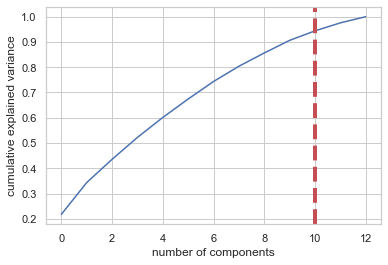

None

,Cumulative Variance Ratio,Explained Variance Ratio
0,0.217669,0.217669
1,0.343513,0.125844
2,0.435539,0.092026
3,0.522249,0.086710
4,0.601181,0.078932


In [111]:
import seaborn as sns
from sklearn.decomposition import PCA
pca_test = PCA(n_components=13)
pca_test.fit(X_train)
sns.set(style='whitegrid')
plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axvline(linewidth=4, color='r', linestyle = '--', x=10, ymin=0, ymax=1)
display(plt.show())
evr = pca_test.explained_variance_ratio_
cvr = np.cumsum(pca_test.explained_variance_ratio_)
pca_df = pd.DataFrame()
pca_df['Cumulative Variance Ratio'] = cvr
pca_df['Explained Variance Ratio'] = evr
display(pca_df.head())

In [112]:
pca = PCA(n_components=13)
pca.fit(X_train)
X_train_scaled_pca = pca.transform(X_train)
X_test_scaled_pca = pca.transform(X_test)

### Fit to random forest after PCA

In [113]:
rfc = RandomForestClassifier()
rfc.fit(X_train_scaled_pca, y_train)
display(rfc.score(X_train_scaled_pca, y_train))

1.0

### Perform Hyperparameter tuning to improve accuracy

In [114]:
from sklearn.model_selection import GridSearchCV
n_estimators = [100,150,200]
max_features = ['sqrt']
max_depth = [2,3,7,11,15]
min_samples_split = [2,3,4,22,23,24]
min_samples_leaf = [2,3,4,5,6,7]
bootstrap = [False]
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
gs = GridSearchCV(rfc, param_grid, cv = 3, verbose = 1, n_jobs=-1)
gs.fit(X_train_scaled_pca, y_train)
rfc_3=gs.best_estimator_
gs.best_params_


Fitting 3 folds for each of 540 candidates, totalling 1620 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   11.6s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   17.8s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:   26.5s
[Parallel(n_jobs=-1)]: Done 1226 tasks      | elapsed:   41.2s
[Parallel(n_jobs=-1)]: Done 1620 out of 1620 | elapsed:   52.9s finished


{'bootstrap': False,
 'max_depth': 2,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 3,
 'n_estimators': 150}

### Evaluate performance of model on test data

In [115]:
y_pred = rfc.predict(X_test)
y_pred_pca = rfc.predict(X_test_scaled_pca)
y_pred_gs = gs.best_estimator_.predict(X_test_scaled_pca)

In [117]:
from sklearn.metrics import confusion_matrix
conf_matrix_baseline_pca = pd.DataFrame(confusion_matrix(y_test, y_pred_pca), index = ['actual 0', 'actual 1'], columns = ['predicted 0', 'predicted 1'])
conf_matrix_tuned_pca = pd.DataFrame(confusion_matrix(y_test, y_pred_gs), index = ['actual 0', 'actual 1'], columns = ['predicted 0', 'predicted 1'])

display('The accuracy achieved using Random Forest With PCA is', recall_score(y_test, y_pred_pca))
display('The accuracy achieved using Hyperparameter Tuned Random Forest With PCA is', recall_score(y_test, y_pred_gs))

'The accuracy achieved using Random Forest With PCA is'

0.9298245614035088

'The accuracy achieved using Hyperparameter Tuned Random Forest With PCA is'

0.9122807017543859

## Artificial Neural Network

In [118]:
## Spliting the train and test data for implementation of artificial neural network
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.20, random_state=0)
X_train.shape
print(X_train.shape)
X_test.shape
print(X_test.shape)
Y_train.shape
print(Y_train.shape)
Y_test.shape
print(Y_test.shape)

(242, 13)
(61, 13)
(242,)
(61,)


In [119]:
# Normalizing the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [120]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(6, kernel_initializer="uniform", activation = 'relu', input_dim = 13))
# Adding the second hidden layer
classifier.add(Dense(6, kernel_initializer="uniform", activation = 'relu'))
# Adding the output layer
classifier.add(Dense(1, kernel_initializer="uniform", activation = 'sigmoid'))
# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [121]:
# Fitting the ANN to the Training set
model=classifier.fit(X_train, Y_train, batch_size = 10, epochs = 50)

Epoch 1/50
25/25 [==============================] - 0s 748us/step - loss: 0.6931 - accuracy: 0.5377
Epoch 2/50
25/25 [==============================] - 0s 1ms/step - loss: 0.6922 - accuracy: 0.5491
Epoch 3/50
25/25 [==============================] - 0s 999us/step - loss: 0.6888 - accuracy: 0.6836
Epoch 4/50
25/25 [==============================] - 0s 1ms/step - loss: 0.6763 - accuracy: 0.8249
Epoch 5/50
25/25 [==============================] - 0s 1ms/step - loss: 0.6557 - accuracy: 0.8091
Epoch 6/50
25/25 [==============================] - 0s 997us/step - loss: 0.6173 - accuracy: 0.8505
Epoch 7/50
25/25 [==============================] - 0s 997us/step - loss: 0.5639 - accuracy: 0.8547
Epoch 8/50
25/25 [==============================] - 0s 1ms/step - loss: 0.5076 - accuracy: 0.8579
Epoch 9/50
25/25 [==============================] - 0s 997us/step - loss: 0.4517 - accuracy: 0.8644
Epoch 10/50
25/25 [==============================] - 0s 957us/step - loss: 0.4207 - accuracy: 0.8595
Epoch 1

In [122]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [123]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred)
cm
from sklearn.metrics import  accuracy_score
    
ann_acc = round((accuracy_score(Y_test, y_pred))*100,2)
print('The Accuracy score achieved using Artificial Neural Network is: {0:0.2f}'.format(ann_acc)+ " %")

The Accuracy score achieved using Artificial Neural Network is: 86.89 %


## Ensemble Learning

In [124]:
## Ensemble learning of two more models is called Multi model ensemble
## Multi model ensemble is done using voting classifier

## GridSearchCV to find the optimal values of hyperparameters of Decision tree
dtc=DecisionTreeClassifier()
parameters=[{'max_depth':[3,None]},
             {'min_samples_leaf':np.arange(1,10)},
             {'criterion':['gini','entropy']}]
grid_search=GridSearchCV(dtc,parameters,scoring='accuracy',cv=5)
grid_search.fit(X_train,Y_train)
best_dtc=grid_search.best_estimator_

#GridSearchCV to find the optimal values of hyperparameters
knn=KNeighborsClassifier()
parameters=[{'n_neighbors':np.arange(1,10)}]
grid_search=GridSearchCV(knn,parameters,scoring='accuracy',cv=5)
grid_search.fit(X_train,Y_train)
best_knn=grid_search.best_estimator_

from sklearn.ensemble import VotingClassifier
estimators=[('rfc',rfc_3),('dt',best_dtc),('Knn',best_knn)]
ensemble1 = VotingClassifier(estimators, voting='hard')
ensemble1.fit(X_train, Y_train)
ensemble_accuracy=(round(ensemble1.score(X_test,Y_test)*100,2))
print('The Accuracy score achieved using Ensemble of Random forest,decision tree and K-nearest neighbours is: {0:0.2f}'.format(ensemble_accuracy)+ " %")

The Accuracy score achieved using Ensemble of Random forest,decision tree and K-nearest neighbours is: 88.52 %


## Accuracy Validation

In [125]:
df=pd.DataFrame({'Model': ['Linear Regression','Support Vector Machine',
                    'K-Nearest Neighbour','Decision Tree','Random forest','Ann','Ensemble Learning'], 'Accuracy': 
                 [lr_acc,svm_acc,knn_acc,dt_acc,rn_acc,ann_acc,ensemble_accuracy]})
df

,Model,Accuracy
0,Linear Regression,81.42
1,Support Vector Machine,79.65
2,K-Nearest Neighbour,82.30
3,Decision Tree,76.99
4,Random forest,84.07
5,Ann,86.89
6,Ensemble Learning,88.52


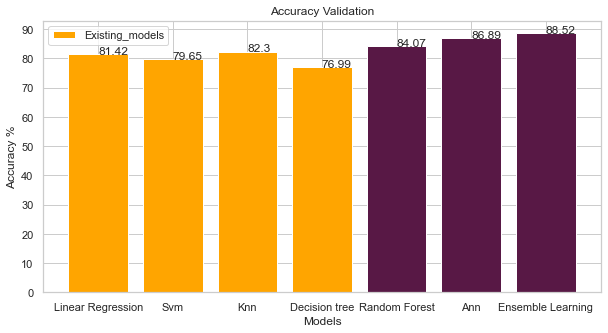

In [126]:
x=['Linear Regression','Svm','Knn','Decision tree','Random Forest','Ann','Ensemble Learning']
y=[lr_acc,svm_acc,knn_acc,dt_acc,rn_acc,ann_acc,ensemble_accuracy]
colors = ['orange','orange','orange','orange','#581845','#581845','#581845',]
plt.figure(figsize=(10,5))
plt.bar(x,y,color=colors)
for i in range(len(x)):
    plt.text(i, y[i], y[i])
plt.yticks(np.arange(0,100,10))
plt.xlabel('Models')
plt.ylabel('Accuracy %')
plt.title('Accuracy Validation')
plt.legend(['Existing_models'])
plt.show()

In [127]:
existing_models_scores=((lr_acc+svm_acc+knn_acc+dt_acc)/4)
print('Existing models average accuracy:{0:0.2f}'.format(existing_models_scores)+ " %")
proposed_models_scores=((ann_acc+ensemble_accuracy)/2)
print('Proposed models average accuracy:{0:0.2f}'.format(proposed_models_scores)+ " %")

Existing models average accuracy:80.09 %
Proposed models average accuracy:87.70 %


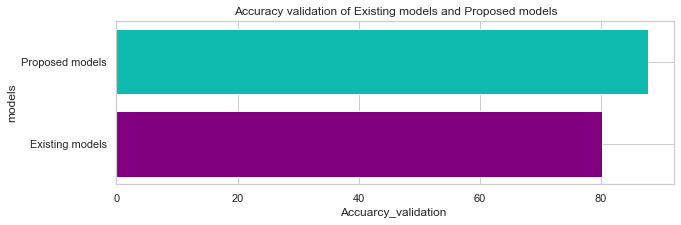

In [128]:
models=['Existing models','Proposed models']
Accuarcy_validation=[existing_models_scores,proposed_models_scores]
plt.figure(figsize=(10,3))
plt.title("Accuracy validation of Existing models and Proposed models")
plt.xlabel("Accuarcy_validation ")
plt.ylabel("models")
plt.barh(models,Accuarcy_validation,color =('purple','#0FBBAE'))
plt.show()